In [1]:
import argparse
import numpy as np
import matplotlib.pyplot as plt

from rna_folding.evaluate import f1_score
from rna_folding.parsing import gpmap_to_dict

In [2]:
parser = argparse.ArgumentParser()
args = parser.parse_args([])
args.genotypes = "/home/lgold/phd/research/projects/connectivity/rna_folding/data/RNA12/RNA12_gt.txt"
args.phenotypes = "/home/lgold/phd/research/projects/connectivity/rna_folding/data/RNA12/RNA12_ph.txt"
args.reference = "/home/lgold/phd/research/projects/connectivity/rna_folding/data/sgreenbury_gp-maps-nav/gp_maps/RNA_12/gp_map.txt"
    

In [3]:
gp_map = gpmap_to_dict(args.phenotypes, args.genotypes)
    
with open(args.reference, "r") as ref:
    ref_dict = dict([line.strip().split() for line in ref])

f1_scores = {}
f1_scores_avg = {}
for query_seq in gp_map:
    ref_ss = ref_dict[query_seq]
    # loop over suboptimal strucs and compare to ref
    f1 = [f1_score(ref_ss, query_ss) 
            for query_ss in gp_map[query_seq]]
    f1_scores[query_seq] = f1
    f1_scores_avg[query_seq] = np.mean(f1)

f1_score_avg_no_zero = [i for i in f1_scores_avg.values() if i > 0]

Script code above

In [4]:
unfolded = "............"

both_unfold_count = 0
ref_unfold_count = 0
unfolded_gts = []
for seq, score in f1_scores_avg.items():
    if score == 0:
        if ref_dict[seq] == unfolded:
            ref_unfold_count += 1
        if gp_map[seq][0] == unfolded:
            unfolded_gts.append(seq)
        if ref_dict[seq] == unfolded and gp_map[seq][0] == unfolded:
            both_unfold_count += 1

print(both_unfold_count, ref_unfold_count, len(gp_map), len(gp_map)-ref_unfold_count)

14546 14325304 16777216 2451912


In [5]:
unfolded_f1_score_over_zero = []
for seq in unfolded_gts:
    if f1_scores_avg[seq] > 0:
        unfolded_f1_score_over_zero.append(seq)
print(len(unfolded_f1_score_over_zero))

# all unfolded have F1 score of zero

0


In [6]:
q_uf_r_uf = 0
q_f_r_uf = 0
q_f_r_f = 0
q_uf_r_f = 0

f1_scores_by_folding = [[[], []],[[], []]]

for seq in f1_scores_avg:
    if gp_map[seq][0] == unfolded:
        if ref_dict[seq] == unfolded:
            f1_scores_by_folding[0][0].append(f1_scores[seq])
            q_uf_r_uf += 1
        else:
            f1_scores_by_folding[1][0].append(f1_scores[seq])
            q_uf_r_f += 1
    else:
        if ref_dict[seq] == unfolded:
            f1_scores_by_folding[0][1].append(f1_scores[seq])
            q_f_r_uf += 1
        else:
            f1_scores_by_folding[1][1].append(f1_scores[seq])
            q_f_r_f += 1
            
folding_matches = np.array([[q_uf_r_uf, q_f_r_uf],[q_uf_r_f, q_f_r_f]])

In [11]:
folding_matches

array([[   14546, 14310758],
       [       0,  2451912]])

(array([493120., 181704., 298976., 254183., 232334., 245456., 132049.,
        112243., 319022., 182825.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

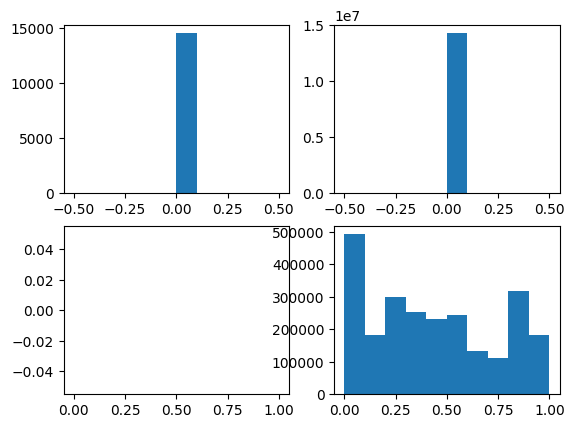

In [7]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
ax1.hist([np.mean(i) for i in f1_scores_by_folding[0][0]])
ax2.hist([np.mean(i) for i in f1_scores_by_folding[0][1]])
ax3.hist([np.mean(i) for i in f1_scores_by_folding[1][0]])
ax4.hist([np.mean(i) for i in f1_scores_by_folding[1][1]])

(array([4.661650e+05, 0.000000e+00, 4.900000e+01, 1.250000e+02,
        1.393000e+03, 1.767400e+04, 7.765700e+04, 0.000000e+00,
        5.923020e+05, 1.296547e+06]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

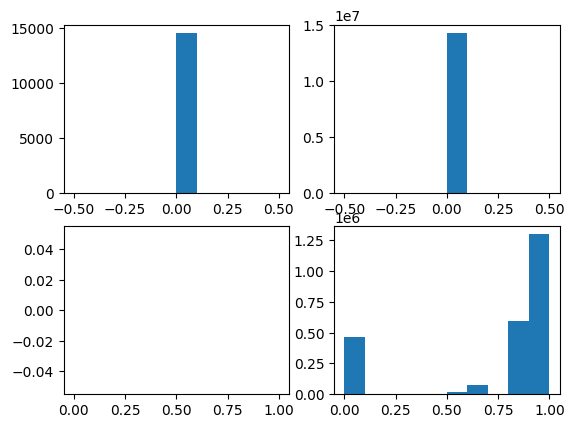

In [8]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
ax1.hist([np.max(i) for i in f1_scores_by_folding[0][0]])
ax2.hist([np.max(i) for i in f1_scores_by_folding[0][1]])
ax3.hist([np.max(i) for i in f1_scores_by_folding[1][0]])
ax4.hist([np.max(i) for i in f1_scores_by_folding[1][1]])

(array([1656426.,       0.,   26229.,   82233.,   38889.,   84177.,
         147700.,   70247.,  163186.,  182825.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

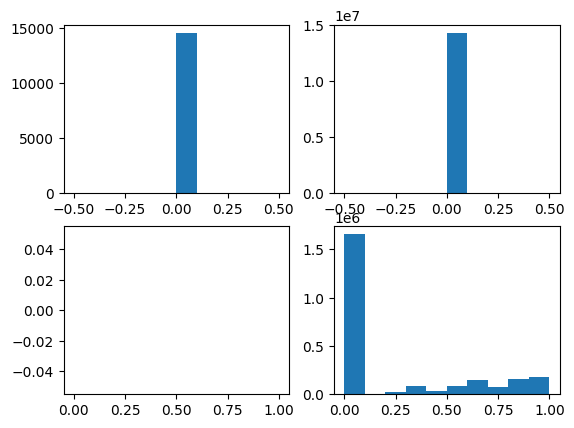

In [9]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
ax1.hist([np.min(i) for i in f1_scores_by_folding[0][0]])
ax2.hist([np.min(i) for i in f1_scores_by_folding[0][1]])
ax3.hist([np.min(i) for i in f1_scores_by_folding[1][0]])
ax4.hist([np.min(i) for i in f1_scores_by_folding[1][1]])

(array([1.594395e+06, 5.788160e+05, 2.012380e+05, 5.349600e+04,
        2.019100e+04, 3.159000e+03, 3.470000e+02, 2.300000e+02,
        3.800000e+01, 2.000000e+00]),
 array([ 1. ,  5.7, 10.4, 15.1, 19.8, 24.5, 29.2, 33.9, 38.6, 43.3, 48. ]),
 <BarContainer object of 10 artists>)

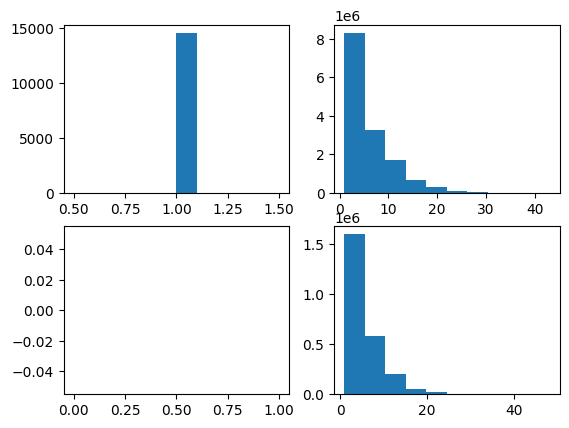

In [10]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
ax1.hist([len(i) for i in f1_scores_by_folding[0][0]])
ax2.hist([len(i) for i in f1_scores_by_folding[0][1]])
ax3.hist([len(i) for i in f1_scores_by_folding[1][0]])
ax4.hist([len(i) for i in f1_scores_by_folding[1][1]])

In [15]:
perf_matches = 0
for seq in gp_map:
    for db in gp_map[seq]:
        if db == ref_dict[seq]:
            perf_matches += 1
            continue
print(perf_matches, perf_matches-folding_matches[0, 0], (perf_matches-folding_matches[0, 0])/folding_matches[1, 1], perf_matches/folding_matches[1, 1])

1311093 1296547 0.5287901849658552 0.5347226980413653


In [13]:
folding_matches[0, 0]

14546

In [130]:
count = 0
for i in gp_map.values():
    if i[0] == unfolded:
        count += 1
print(count)

1722


(array([14325304.,        0.,   174539.,        0.,        0.,   989898.,
               0.,  1062890.,        0.,   224585.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

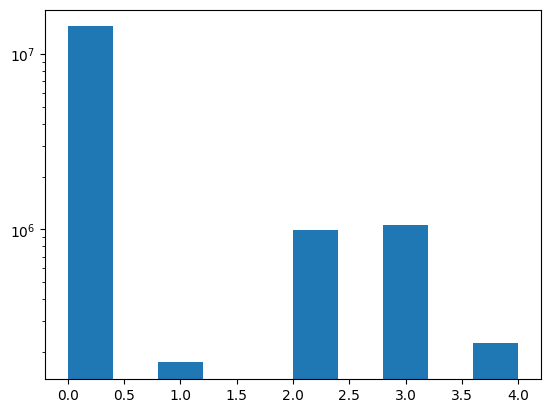

In [18]:
## REF bp histogram

def count_bp(seq):
    bp_count = 0
    for i in seq:
        if i == "(":
            bp_count += 1
    return bp_count

ref_bp_counts = [count_bp(db) for db in ref_dict.values()]
plt.yscale('log')
plt.hist(ref_bp_counts)
    

(array([  14546.,       0.,  373002.,       0.,       0., 4644342.,
              0., 9988014.,       0., 1757312.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

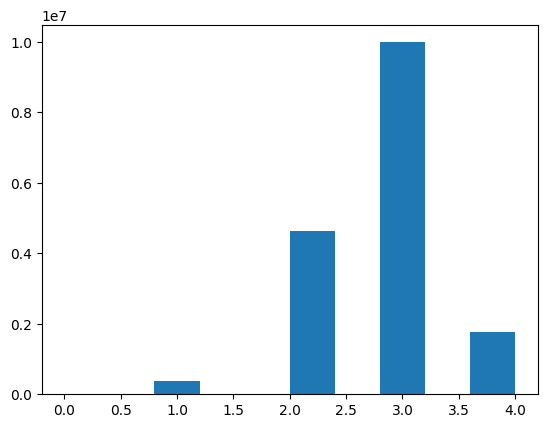

In [19]:
# dont need to take average because suboptimal range is 0 so all have same number of bp
pred_bp_counts = [count_bp(db_list[0]) for db_list in gp_map.values()]
plt.hist(pred_bp_counts)

In [20]:
ref_bp_counts_sorted = []
pred_bp_counts_sorted = []
for seq in gp_map:
    ref_bp_counts_sorted.append(count_bp(ref_dict[seq]))
    pred_bp_counts_sorted.append(count_bp(gp_map[seq][0]))

In [31]:
bp_count_pairs = zip(ref_bp_counts_sorted, pred_bp_counts_sorted)
counts_matrix_ = np.zeros((5,5))
for count_pair in bp_count_pairs:
        counts_matrix_[count_pair] += 1
counts_matrix = np.log10(counts_matrix_)

/tmp/ipykernel_216293/789266543.py:5: RuntimeWarning: divide by zero encountered in log10
  counts_matrix = np.log10(counts_matrix_)


In [32]:
counts_matrix_

array([[1.454600e+04, 3.675440e+05, 4.343459e+06, 8.395064e+06,
        1.204691e+06],
       [0.000000e+00, 5.458000e+03, 6.157900e+04, 9.478100e+04,
        1.272100e+04],
       [0.000000e+00, 0.000000e+00, 2.393040e+05, 6.709690e+05,
        7.962500e+04],
       [0.000000e+00, 0.000000e+00, 0.000000e+00, 8.272000e+05,
        2.356900e+05],
       [0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        2.245850e+05]])

Text(0.5, 1.0, 'base-pair counts (log10)')

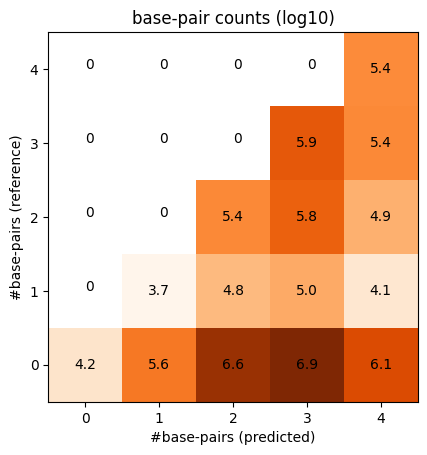

In [34]:
fig, ax = plt.subplots()

ax.imshow(counts_matrix, cmap='Oranges', interpolation='nearest', origin='lower')
for i in range(counts_matrix.shape[0]):
    for j in range(counts_matrix.shape[1]):
        if counts_matrix[i, j] < 0:
            ax.text(j, i, "0")
        else:
            ax.text(j, i, "{:.1f}".format(counts_matrix[i, j]), va='center', ha='center')
ax.set_xlabel("#base-pairs (predicted)")
ax.set_ylabel("#base-pairs (reference)")
ax.set_title("base-pair counts (log10)")

In [23]:
counts_matrix

array([[ 4.16274358,  5.56530934,  6.63783573,  6.92402401,  6.08087567],
       [       -inf,  3.73703353,  4.78943263,  4.97672129,  4.10452125],
       [-0.47712125, -0.17609126,  5.37894996,  5.82670267,  4.90105308],
       [-0.47712125, -0.17609126,  0.        ,  5.9176107 ,  5.37234177],
       [-0.17609126,        -inf,        -inf, -0.47712125,  5.35138075]])

In [136]:
zip(f1_scores, f1_scores_avg)
f1_scores_max = [np.max(scores) for scores in f1_scores]
f1_scores_sorted_on_max = [f1_score_list for _, f1_score_list in sorted(zip(f1_scores_max, f1_scores))]
f1_scores_sorted_on_avg = [f1_score_list for _, f1_score_list in sorted(zip(f1_scores_avg, f1_scores))]

UFuncTypeError: ufunc 'maximum' did not contain a loop with signature matching types (dtype('<U12'), dtype('<U12')) -> None

In [ ]:
f1_scores_avg_lst = []
f1_scores_max_lst = []
f1_scores_min_lst = []
for scores in f1_scores:
    f1_scores_avg_lst.append(np.mean(scores))
    f1_scores_max_lst.append(np.max(scores))
    f1_scores_min_lst.append(np.min(scores))

f1_scores_sorted_on_avg = [f1_score_list for _, f1_score_list in sorted(zip(f1_scores_avg_lst, f1_scores))]


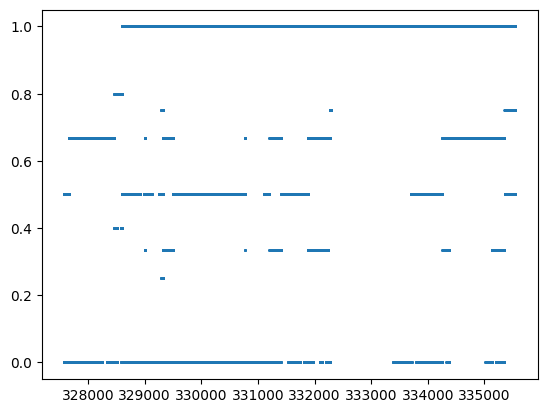

In [ ]:
fig, ax = plt.subplots()
x = []
y = []
for i, scores in enumerate(f1_scores_sorted_on_max):
    if np.max(scores) == 0:
        continue
    for score in scores:
        x.append(i)
        y.append(score)

ax.scatter(x, y, s=1)

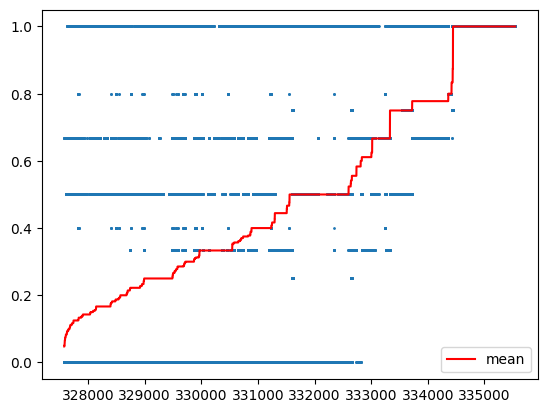

In [ ]:
fig, ax = plt.subplots()
x = []
y = []
x_avg = []
avg = []
for i, scores in enumerate(f1_scores_sorted_on_avg):
    if np.max(scores) == 0:
        continue
    x_avg.append(i)
    avg.append(np.mean(scores))
    for score in scores:
        x.append(i)
        y.append(score)

ax.scatter(x, y, s=1)
ax.plot(x_avg, avg, color="red", label="mean")
ax.legend()

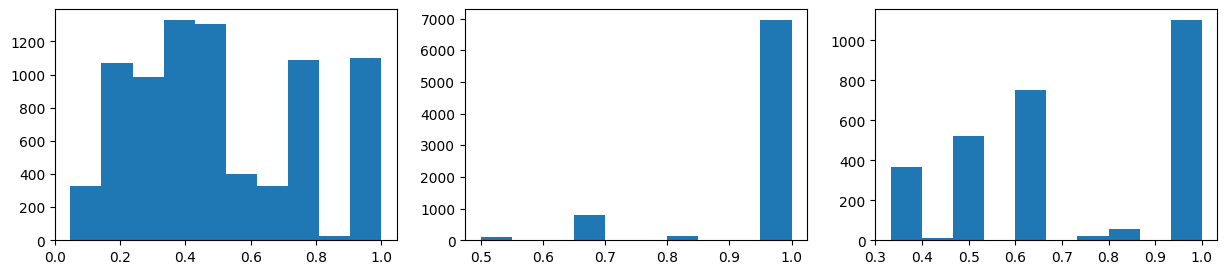

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15, 3))
his1 = ax1.hist([i for i in f1_scores_avg_lst if i > 0])
his2 = ax2.hist([i for i in f1_scores_max_lst if i > 0])
his3 = ax3.hist([i for i in f1_scores_min_lst if i > 0])

/tmp/ipykernel_216293/2541852780.py:12: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  m, c = np.linalg.lstsq(A, np.array(f1_bp))[0]


Text(0, 0.5, 'Average F1 score across predictions')

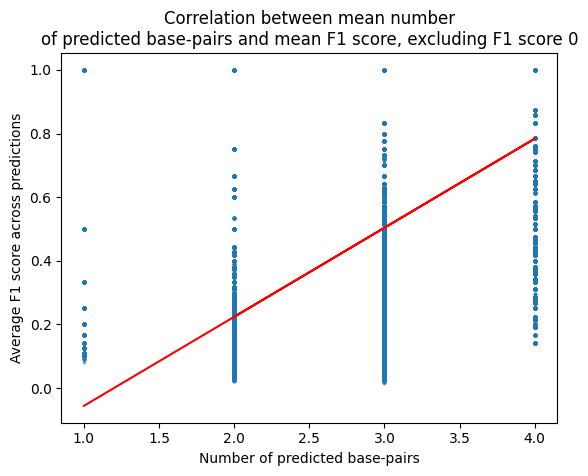

In [36]:
c_bp = []
f1_bp = []
for seq in f1_scores_avg:
    if f1_scores_avg[seq] == 0:
        continue
    f1_bp.append(f1_scores_avg[seq])
    c_bp.append(np.mean([count_bp(db) for db in gp_map[seq]]))
    

c_bp_arr = np.array(c_bp)
A = np.vstack([c_bp_arr, np.ones(len(c_bp))]).T
m, c = np.linalg.lstsq(A, np.array(f1_bp))[0]
plt.plot(c_bp_arr, m*c_bp_arr + c, 'r', label='Fitted line')

plt.scatter(c_bp, f1_bp, alpha=0.5, s=3)
plt.title("Correlation between mean number\nof predicted base-pairs and mean F1 score, excluding F1 score 0")
plt.xlabel("Number of predicted base-pairs")
plt.ylabel("Average F1 score across predictions")